# Module 2 Capstone Project

## Background
A brief description about Airbnb: <br>
Airbnb, Inc. is an American San Francisco-based company operating an online marketplace for short and long-term homestays and experiences. The company acts as a broker and charges a commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia.<br>

The company assign their data analyst team to analyze airbnb dataset in Bangkok. The data contains of listings that has been registered to airbnb application. There are many property that is registered to the application with four different room type (Entire home/apt, Private rooms, Shared rooms, and Hotel). However, not every listing has ever been rented before. Approximately one third of the data has never been rented or has no traffic at all. The data analyst team need to clean the data, analyze the data, and get useful insights/informations and recommendations from the dataset given.

## Problem Statement
The company wants to **increase the popularity/traffic for listings that has no / little traffic**. The information that could be gained through the dataset could helps the airbnb property owner to get some recommendations on how to get / increase traffics for their listings.<br><br>
As a data analyst, we need to answer this following question:<br>
**How can we increase the traffic through insights from the historical data given? So that in the future, there won't be any listings in airbnb that has no traffic and could increase the traffic in listings that has little traffics.** 

## Data
The data can be found in [here](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF)

In [138]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Below is the description of each column in the dataset:
- id: unique id for each listing<br>
- name: airbnb listing name (not unique)<br>
- host_id: unique id for host that has listing(s)<br>
- host_name: the name of the host<br>
- neighbourhood: area / district where the property is placed<br>
- latitude: latitutde of the property<br>
- longitude: longitude of the property<br>
- room_type: room type of the listing, which is divided by four types:
    - Entire place, the entire unit is for rent, there is a possibility to stay with the landlord
    - Private rooms, only renting a private room, other facilities might be shared with other tenants
    - Shared rooms, a sharing room
    - Hotel<br>
- price: renting price in baht<br>
- minimum_nights: minimum stay in the airbnb place<br>
- number_of_reviews: number of review the listing has<br>
- last_review: the last time a review is given in date time<br>
- reviews_per_month: average review per month the listing got<br>
- calculated_host_listings_count: number of properties / listings the host has<br>
- availability_365: number of days the listing is available in a year<br>
- number_of_reviews_ltm: number of reviews in the last twelve months<br><br>

### Load the dataset

In [3]:
df = pd.read_csv("Airbnb Listings Bangkok.csv")
del df[df.columns[0]]
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


## Understanding the data

In [4]:
# (number of rows, number of columns)
df.shape

(15854, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15854 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

There are 5790 null values in column "last_review" and "reviews_per_month, and 8 null values in "name" column

In [6]:
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

As we can see, the minimum value of "price" and "availability_365" is 0 which is weird as price and the availability in one year time period should not be 0, otherwise the listings should / could not be rented.

In [7]:
df.describe(include="all")

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,15846,1.585400e+04,15854,15854,15854.000000,15854.000000,15854,1.585400e+04,15854.000000,15854.000000,10064,10064.000000,15854.000000,15854.000000,15854.000000
unique,NaN,14794,NaN,5313,50,NaN,NaN,4,NaN,NaN,NaN,1669,NaN,NaN,NaN,NaN
top,NaN,New! La Chada Night Market studio 2PPL near MRT,NaN,Curry,Vadhana,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-12-11,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,228,2153,NaN,NaN,8912,NaN,NaN,NaN,189,NaN,NaN,NaN,NaN
mean,1.579397e+17,NaN,1.541058e+08,NaN,NaN,13.745144,100.559903,NaN,3.217704e+03,15.292355,16.654157,NaN,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,NaN,1.318726e+08,NaN,NaN,0.043040,0.050911,NaN,2.497212e+04,50.815020,40.613331,NaN,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,NaN,5.892000e+04,NaN,NaN,13.527300,100.329550,NaN,0.000000e+00,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,NaN,3.974431e+07,NaN,NaN,13.720090,100.529690,NaN,9.000000e+02,1.000000,0.000000,NaN,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,NaN,1.224556e+08,NaN,NaN,13.738490,100.561415,NaN,1.429000e+03,1.000000,2.000000,NaN,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,NaN,2.390547e+08,NaN,NaN,13.759497,100.585150,NaN,2.429000e+03,7.000000,13.000000,NaN,1.060000,13.000000,360.000000,3.000000


In [8]:
avail_0 = len(df.loc[df["availability_365"] == 0]) / len(df) * 100
price_0 = len(df.loc[df["price"] == 0]) / len(df) * 100
print("Percentage of data with 'availability_365' = 0: " + str(round(avail_0, 2)) + "%")
print("Percentage of data with 'price' = 0: " + str(round(price_0, 2)) + "%")

Percentage of data with 'availability_365' = 0: 5.41%
Percentage of data with 'price' = 0: 0.01%


## Cleaning the data

Removing null values and redundant variable / column

In [9]:
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Filling null data in "name" column with "Not Mentioned"

In [10]:
df["name"] = df["name"].fillna("Not Mentioned")

Filling null data in reviews_per_month with 0

In [11]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

Dropping unnecessary variable (last_review) as we won't need it for our analysis later on

In [12]:
df = df.drop(columns="last_review")
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0.00,3,365,0


In [13]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Checking duplicated values

In [14]:
df.duplicated().sum()

0

Dropping data that has the "price" and "availability_365" value equals to 0 as it is not going to help the analysis later on and its only 0.01% and 5% of the data respectively

In [15]:
df = df.drop(df[df["price"] == 0].index)
df = df.drop(df[df["availability_365"] == 0].index)

In [16]:
df.describe(include="all")

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.499700e+04,14997,1.499700e+04,14997,14997,14997.000000,14997.000000,14997,1.499700e+04,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000
unique,NaN,14054,NaN,5127,50,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,30days! AirportLink Sukhumvit NANA MaxValu 2BR...,NaN,Curry,Vadhana,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,35,NaN,168,2041,NaN,NaN,8404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.636930e+17,NaN,1.543924e+08,NaN,NaN,13.744958,100.559969,NaN,3.258908e+03,15.497299,16.804628,0.529289,13.195572,258.343602,3.622058
std,2.985100e+17,NaN,1.326605e+08,NaN,NaN,0.043316,0.051115,NaN,2.563202e+04,50.718536,41.030336,0.970860,27.671138,114.601715,9.107468
min,2.793400e+04,NaN,5.892000e+04,NaN,NaN,13.527300,100.329550,NaN,2.780000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.097223e+07,NaN,3.879844e+07,NaN,NaN,13.719810,100.529770,NaN,9.000000e+02,1.000000,0.000000,0.000000,1.000000,161.000000,0.000000
50%,3.511759e+07,NaN,1.223632e+08,NaN,NaN,13.738100,100.561350,NaN,1.444000e+03,1.000000,2.000000,0.090000,4.000000,321.000000,0.000000
75%,5.328350e+07,NaN,2.403435e+08,NaN,NaN,13.759050,100.585310,NaN,2.424000e+03,7.000000,13.000000,0.710000,13.000000,361.000000,3.000000


In [17]:
tempList = []

for i in df.describe(include="all").columns:
    tempList.append( [i, df[i].nunique()] )

pd.DataFrame(columns=["Column name", "Number of unique items"], data=tempList)

,Column name,Number of unique items
0,id,14997
1,name,14054
2,host_id,6370
3,host_name,5127
4,neighbourhood,50
5,latitude,9275
6,longitude,9893
7,room_type,4
8,price,2937
9,minimum_nights,85


## Data Analysis

### Graphic #1

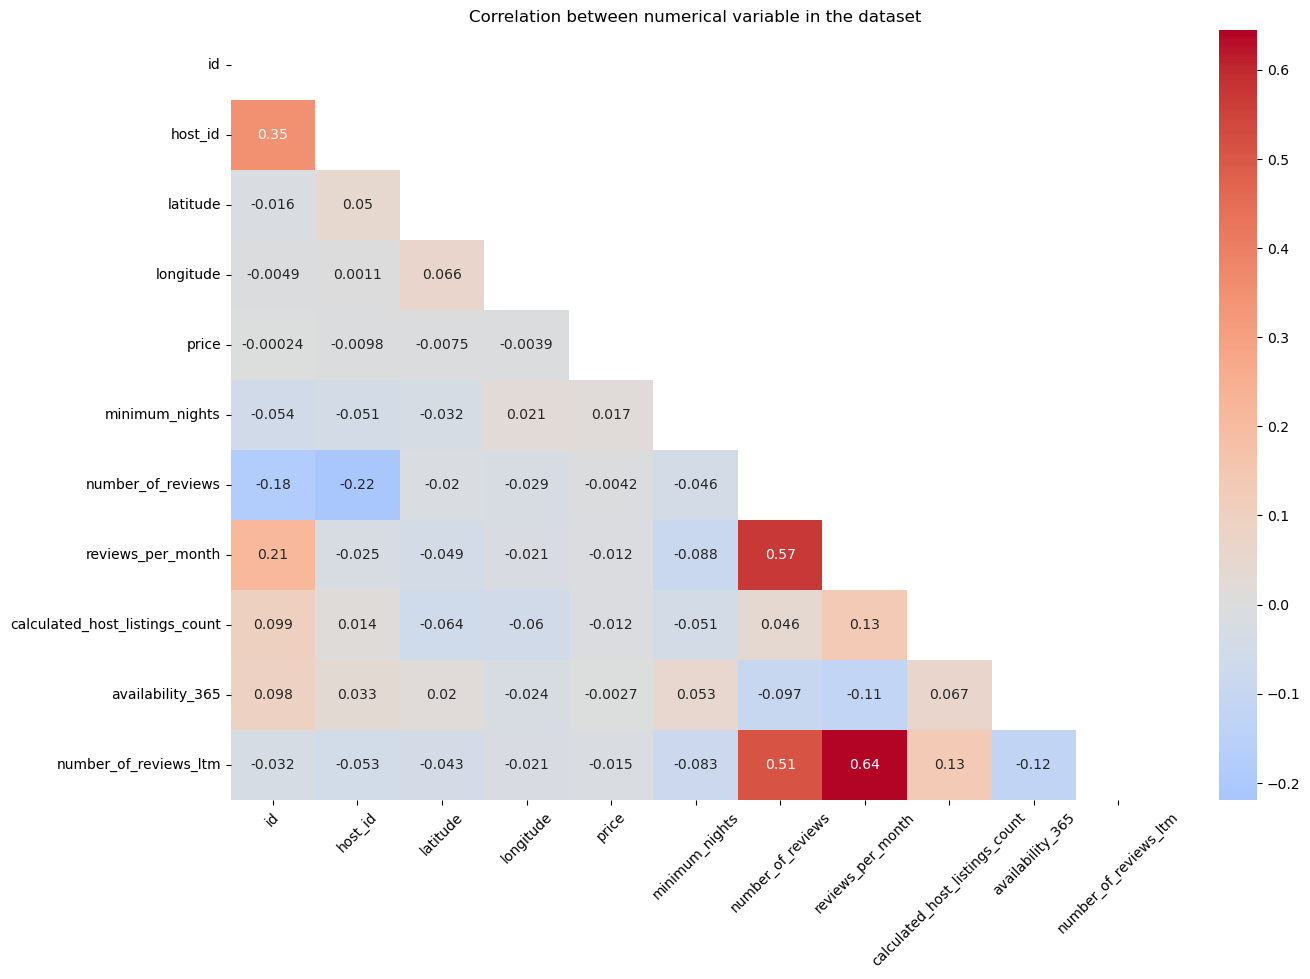

In [58]:
matrix = np.triu(df.corr())

plt.figure(figsize=(15, 10))
sns.heatmap(
    data=df.corr(),
    annot= True,            
    cmap= 'coolwarm',       
    center= 0,
    mask=matrix         
)
plt.xticks(rotation=45)
plt.title("Correlation between numerical variable in the dataset");

Correlation betweeen numerical variables <br>
- id: There is a not so strong correlation between id - host_id, id - number_of_reviews, id - reviews_per_month
- host_id: There is a not so strong correlation host_id - number_of_reviews
- number_of_reviews: There is a quite strong correlation between number_of_reviews - reviews_per_month, number_of_reviews - number_of_reviews_ltm
- reviews_per_month: There is a quite strong correlation between reviews_per_month - number_of_reviews_ltm

---

### Graphic #2

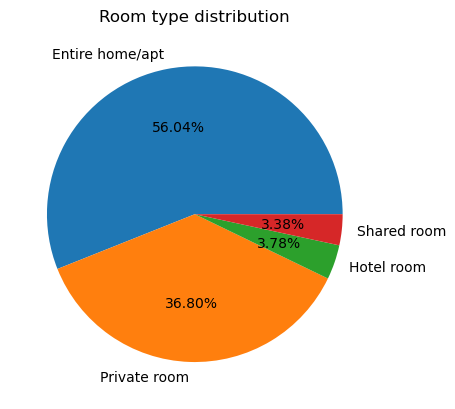

In [54]:
room_type = list(df["room_type"].unique())

entire_home_apt = len(df[df["room_type"] == "Entire home/apt"]) / len(df) * 100
hotel_room = len(df[df["room_type"] == "Hotel room"]) / len(df) * 100
private_room = len(df[df["room_type"] == "Private room"]) / len(df) * 100
shared_room = len(df[df["room_type"] == "Shared room"]) / len(df) * 100

room_type_percentage = [entire_home_apt, private_room, hotel_room, shared_room]

plt.pie(
    x=room_type_percentage,
    labels=room_type,
    autopct=f'%.2f%%'
);
plt.title('Room type distribution');

More than 50% of the room type distribution is Entire home/apt. The second highest count of distribution of room type is private room. Hotel room and shared room has the least count.

---

In [21]:
review_by_room_type = df.groupby(by="room_type")["number_of_reviews"].sum().reset_index()
avg_price_room_type = df.groupby(by="room_type")["price"].mean().reset_index()
ltm_review_room_type = df.groupby(by="room_type")["number_of_reviews_ltm"].sum().reset_index()
max_price_room_type = df.groupby(by="room_type")["price"].max().reset_index()
display(review_by_room_type, avg_price_room_type, ltm_review_room_type, max_price_room_type)

,room_type,number_of_reviews
0,Entire home/apt,189448
1,Hotel room,11646
2,Private room,48269
3,Shared room,2656


,room_type,price
0,Entire home/apt,3546.237744
1,Hotel room,2879.848325
2,Private room,3075.210727
3,Shared room,919.733728


,room_type,number_of_reviews_ltm
0,Entire home/apt,43782
1,Hotel room,1232
2,Private room,9091
3,Shared room,215


,room_type,price
0,Entire home/apt,1100000
1,Hotel room,300000
2,Private room,600700
3,Shared room,31200


### Graphic #3

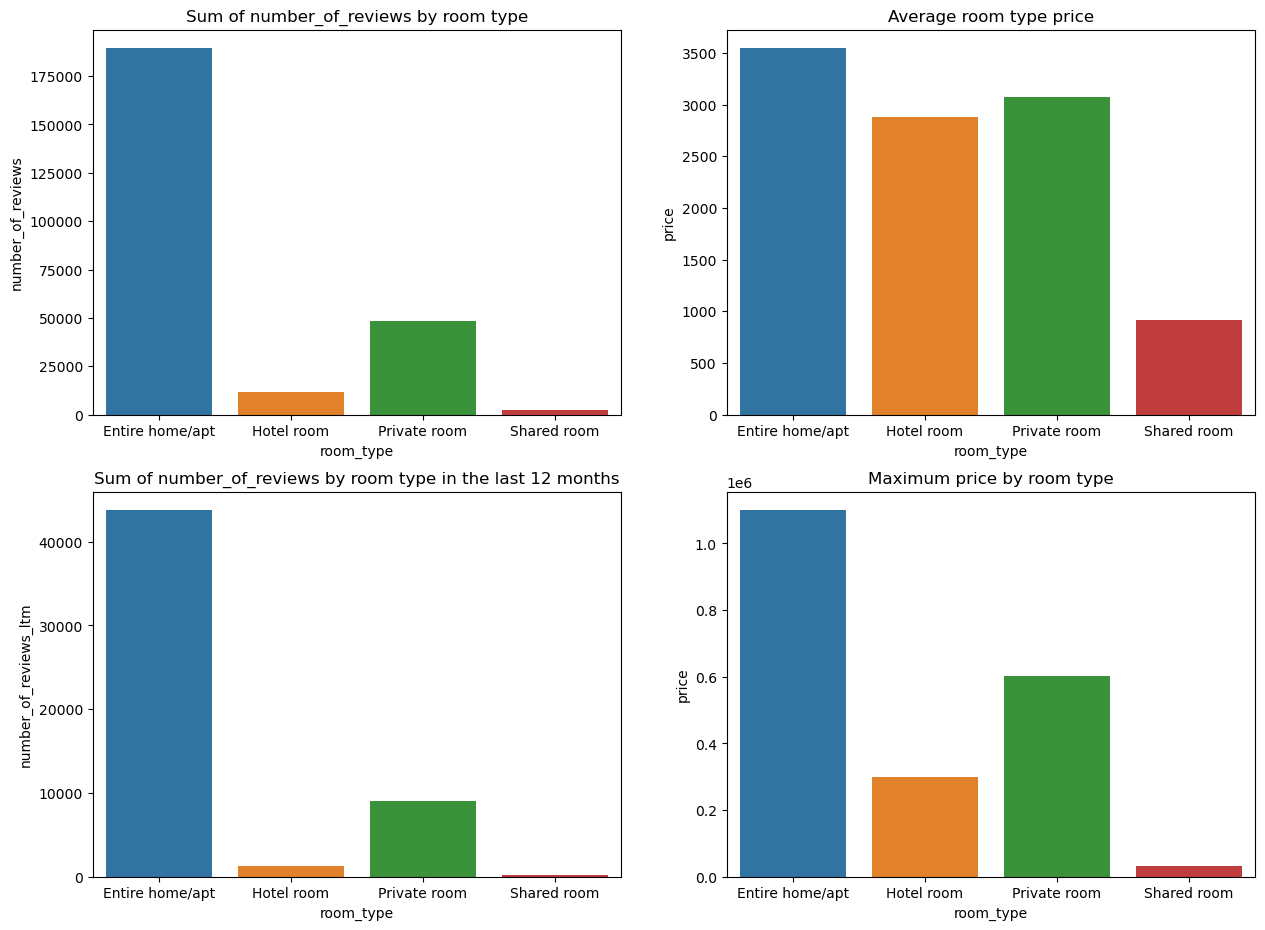

In [60]:
plt.figure(figsize=(15, 11))

plt.subplot(2,2,1)
sns.barplot(data=review_by_room_type, x="room_type", y="number_of_reviews")
plt.title("Sum of number_of_reviews by room type")

plt.subplot(2,2,2)
sns.barplot(data=avg_price_room_type, x="room_type", y="price")
plt.title("Average room type price")

plt.subplot(2,2,3)
sns.barplot(data=ltm_review_room_type, x="room_type", y="number_of_reviews_ltm")
plt.title("Sum of number_of_reviews by room type in the last 12 months")

plt.subplot(2,2,4)
sns.barplot(data=max_price_room_type, x="room_type", y="price")
plt.title("Maximum price by room type");

From the number of reviews, we can see the traffic for each room type, the higher the number of reviews, the more traffic the room type has

Left-side graphic:
- The graphics above shown that Entire home/apt room type has the highest traffic compared to the others
- Private room has the second highest traffic
- Shared room has the least traffic among them all

Right-side graphic:
- The most expensive room type by price average is Entire home/apt. This could be due to the traffic / demand the room type has. The higher the demand, the higher the price will be.
- The same goes to private room as the second highest average price, as it is also the second highest traffic in terms of room type
- However, in the left side graphic, there is a big gap between hotel room and private room traffic, but, in the right side graphic, there is only a small gap in the price. This could be interpreted such that hotel room has a low traffic but the average price is quite high might be due to its services.
- Shared room has the lowest average price among the others

---

In [23]:
neighbourhood_popularity = df.groupby(by="neighbourhood")["number_of_reviews"].sum().reset_index()
neighbourhood_vc = df.neighbourhood.value_counts().reset_index().rename(columns={"index":"neighbourhood", "neighbourhood":"listing_count"})

top20_neighbourhood = neighbourhood_popularity.sort_values(by="number_of_reviews", ascending=False).head(20).sort_values(by="neighbourhood")

top20_neighbourhood_vc = neighbourhood_vc.loc[neighbourhood_vc["neighbourhood"].isin(top20_neighbourhood["neighbourhood"])].sort_values(by="neighbourhood")
top20_neighbourhood_vc = top20_neighbourhood_vc["listing_count"]

top20_neighbourhood["listing_count"] = np.array(top20_neighbourhood_vc)

bot20_neighbourhood = neighbourhood_popularity.sort_values(by="number_of_reviews").head(20).sort_values(by="neighbourhood")

bot20_neighbourhood_vc = neighbourhood_vc.loc[neighbourhood_vc["neighbourhood"].isin(bot20_neighbourhood["neighbourhood"])].sort_values(by="neighbourhood")
bot20_neighbourhood_vc = bot20_neighbourhood_vc["listing_count"]

bot20_neighbourhood["listing_count"] = np.array(bot20_neighbourhood_vc)

display(top20_neighbourhood.sort_values(by="listing_count", ascending=False), bot20_neighbourhood.sort_values(by="listing_count", ascending=False))


,neighbourhood,number_of_reviews,listing_count
47,Vadhana,36658,2041
22,Khlong Toei,39843,2023
37,Ratchathewi,19911,1064
18,Huai Khwang,16243,972
41,Sathon,21983,783
8,Bang Rak,16434,769
33,Phra Nakhon,7352,560
32,Phra Khanong,5528,537
13,Chatu Chak,7823,519
6,Bang Na,5370,441


,neighbourhood,number_of_reviews,listing_count
7,Bang Phlat,748,202
3,Bang Khen,727,115
48,Wang Thong Lang,130,91
2,Bang Khae,153,89
11,Bangkok Yai,755,86
26,Min Buri,131,57
25,Lat Phrao,154,55
12,Bueng Kum,210,50
19,Khan Na Yao,264,50
36,Rat Burana,616,48


### Graphic #4

Text(0.5, 1.0, 'Top 20 least popular neighbourhood number_of_reviews vs listing_count')

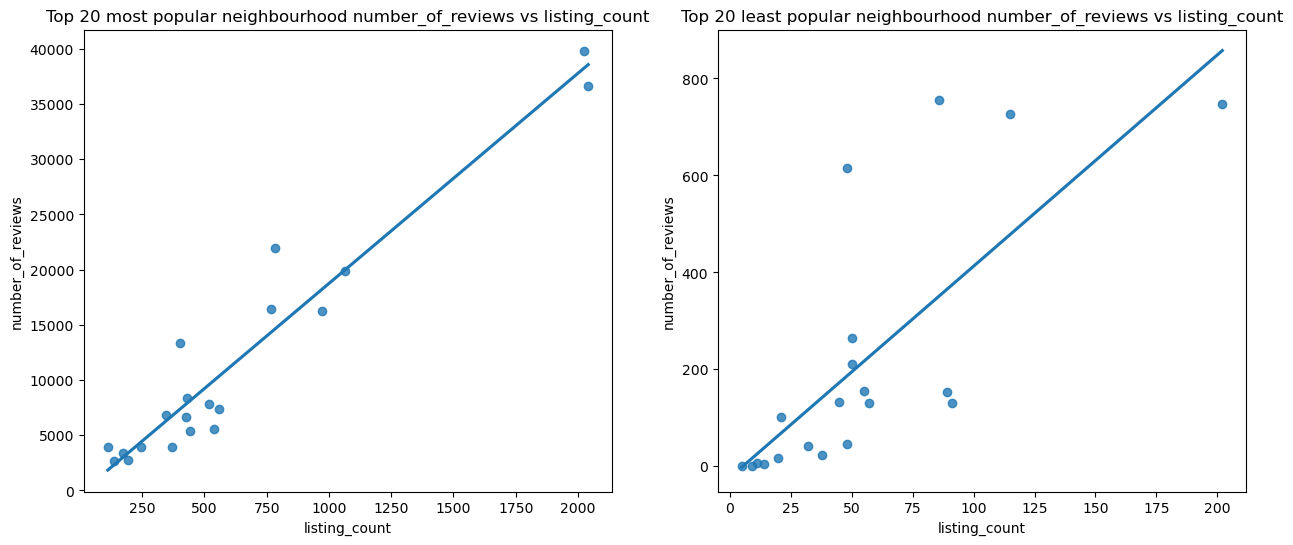

In [61]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.regplot(data=top20_neighbourhood, x="listing_count", y="number_of_reviews", ci=0)
plt.title("Top 20 most popular neighbourhood number_of_reviews vs listing_count")

plt.subplot(1,2,2)
sns.regplot(data=bot20_neighbourhood, x="listing_count", y="number_of_reviews", ci=0)
plt.title("Top 20 least popular neighbourhood number_of_reviews vs listing_count")

Based on the number of reviews, the higher the number of reviews, the more popular the neighbourhood is.<br><br>
On the left-side graphic, the higher the listing_count the higher the number_of_reviews. This means that both listing_count and sum of number_of_reviews has positive correlation.<br>
The same goes for the right-side graphic, which is bottom 20 neighbourhood by popularity, there is a positive correlation between listing_count and sum of number_of_reviews. However, as we can see, there are three outliers data which are from the neighbourhood **Rat Burana, Bangkok Yai, and Bang Khen**. This outliers could be analyzed further on why and how they get more traffic than others in the bottom 20 neighbourhood to give some insights and solutions to the other neighbourhood

---

In [25]:
most_popular_neighbourhood = neighbourhood_popularity.sort_values(by="number_of_reviews", ascending=False).head(5)
most_popular_neighbourhood = most_popular_neighbourhood.sort_index()

least_popular_neighbourhood = neighbourhood_popularity.sort_values(by="number_of_reviews").head(5)
least_popular_neighbourhood = least_popular_neighbourhood.sort_index()

neighbourhood_avg_price = df.groupby(by="neighbourhood")["price"].mean().reset_index()

most_popular_neighbourhood["price"] = neighbourhood_avg_price[neighbourhood_avg_price["neighbourhood"].isin(most_popular_neighbourhood["neighbourhood"])]["price"]
least_popular_neighbourhood["price"] = neighbourhood_avg_price[neighbourhood_avg_price["neighbourhood"].isin(least_popular_neighbourhood["neighbourhood"])]["price"]

most_popular_neighbourhood = most_popular_neighbourhood.sort_values(by="number_of_reviews", ascending=False)
least_popular_neighbourhood = least_popular_neighbourhood.sort_values(by="number_of_reviews", ascending=False)

display(most_popular_neighbourhood, least_popular_neighbourhood)

,neighbourhood,number_of_reviews,price
22,Khlong Toei,39843,4329.557093
47,Vadhana,36658,4489.379716
41,Sathon,21983,2344.411239
37,Ratchathewi,19911,3229.966165
8,Bang Rak,16434,3126.807542


,neighbourhood,number_of_reviews,price
46,Thung khru,16,2061.600000
44,Thawi Watthana,7,1701.636364
27,Nong Chok,4,3279.928571
0,Bang Bon,1,1504.400000
28,Nong Khaem,1,1205.222222


### Graphic #5

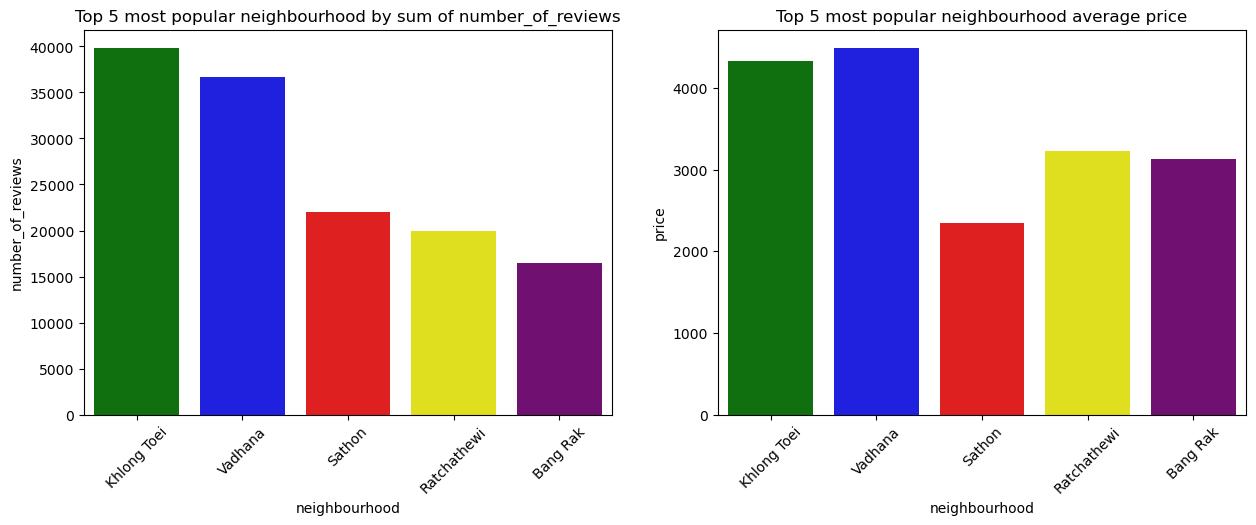

In [63]:
plt.figure(figsize=(15, 5))

palette_1 = {"green", "red", "purple", "yellow", "blue"}
plt.subplot(1,2,1)
sns.barplot(data=most_popular_neighbourhood, x="neighbourhood", y="number_of_reviews", palette=palette_1)
plt.title("Top 5 most popular neighbourhood by sum of number_of_reviews")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(data=most_popular_neighbourhood, x="neighbourhood", y="price", palette=palette_1)
plt.title("Top 5 most popular neighbourhood average price")
plt.xticks(rotation=45);

### Graphic #6

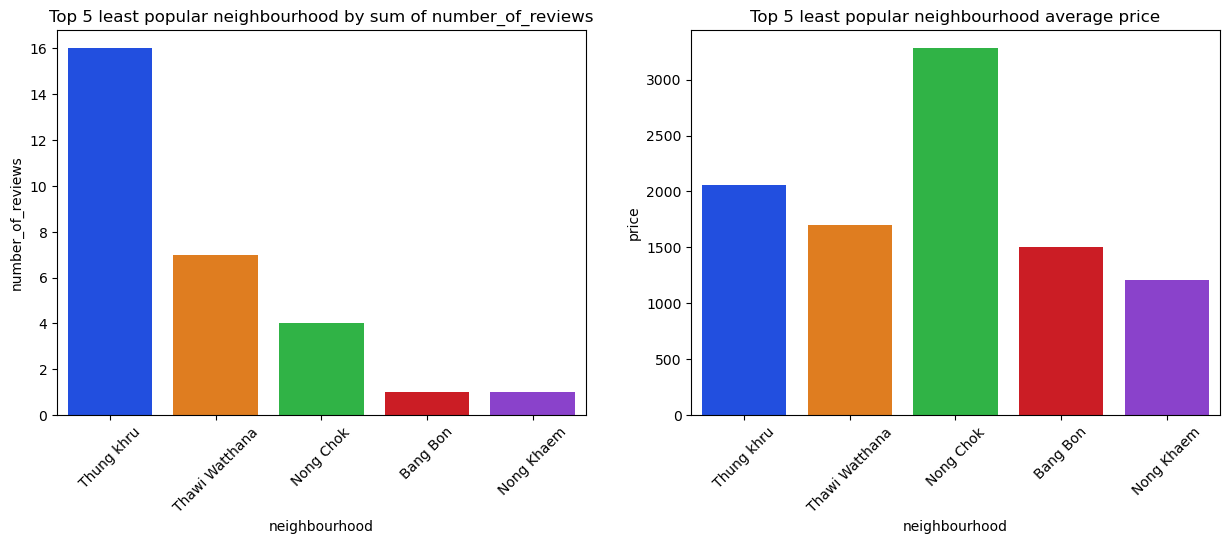

In [64]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.barplot(data=least_popular_neighbourhood, x="neighbourhood", y="number_of_reviews", palette="bright")
plt.title("Top 5 least popular neighbourhood by sum of number_of_reviews")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(data=least_popular_neighbourhood, x="neighbourhood", y="price", palette="bright")
plt.title("Top 5 least popular neighbourhood average price")
plt.xticks(rotation=45);

The same goes for the left side graphics, I measured the popularity of neighbourhood based on its traffic which can be seen through the number of reviews the neighbourhood has. This time, I compared the popularity and average price between top 5 most popular neighbourhood and the top 5 least popular neighbourhood.<br><br>
As we can see from the graph, popularity tend to have a positive correlation with price on the top 5 most popular neighbourhood, the more popular the neighbourhood, the higher the average price for the listings in that neighbourhood. This could be due to the same reason as the graphic before, the more popular the area gets, the higher the pricing for each listing in that neighbourhood.<br>
However, the case is not the same for the top 5 least popular neighbourhood. Thung khru with the most popular in the top 5 least popular neighbourhood tend to have lower average price compared to Nong Chok which is in the third place in the popularity graph. This event could be happened because Thung khru might be in the area where the rental property price is lower than Nong Chok.

---

In [28]:
most_popular_neighbourhood_room_type = df[df["neighbourhood"].isin(most_popular_neighbourhood["neighbourhood"])][["neighbourhood", "room_type"]]
most_popular_neighbourhood_room_type = most_popular_neighbourhood_room_type.groupby(by=["neighbourhood", "room_type"])["room_type"].count()
most_popular_neighbourhood_room_type = most_popular_neighbourhood_room_type.to_frame().rename(columns={"room_type":"count"}).reset_index()

least_popular_neighbourhood_room_type = df[df["neighbourhood"].isin(least_popular_neighbourhood["neighbourhood"])][["neighbourhood", "room_type"]]
least_popular_neighbourhood_room_type = least_popular_neighbourhood_room_type.groupby(by=["neighbourhood", "room_type"])["room_type"].count()
least_popular_neighbourhood_room_type = least_popular_neighbourhood_room_type.to_frame().rename(columns={"room_type":"count"}).reset_index()

display(most_popular_neighbourhood_room_type, least_popular_neighbourhood_room_type)

,neighbourhood,room_type,count
0,Bang Rak,Entire home/apt,314
1,Bang Rak,Hotel room,64
2,Bang Rak,Private room,357
3,Bang Rak,Shared room,34
4,Khlong Toei,Entire home/apt,1481
5,Khlong Toei,Hotel room,57
6,Khlong Toei,Private room,474
7,Khlong Toei,Shared room,11
8,Ratchathewi,Entire home/apt,629
9,Ratchathewi,Hotel room,58


,neighbourhood,room_type,count
0,Bang Bon,Entire home/apt,2
1,Bang Bon,Private room,3
2,Nong Chok,Entire home/apt,8
3,Nong Chok,Private room,6
4,Nong Khaem,Entire home/apt,2
5,Nong Khaem,Private room,7
6,Thawi Watthana,Entire home/apt,4
7,Thawi Watthana,Private room,7
8,Thung khru,Entire home/apt,6
9,Thung khru,Private room,14


In [29]:
most_popular_neighbourhood_room_type_sum_reviews = df[df["neighbourhood"].isin(most_popular_neighbourhood["neighbourhood"])][["neighbourhood", "room_type", "number_of_reviews"]]
most_popular_neighbourhood_room_type_sum_reviews = most_popular_neighbourhood_room_type_sum_reviews.groupby(by=["neighbourhood", "room_type"])["number_of_reviews"].sum().reset_index()

least_popular_neighbourhood_room_type_sum_reviews = df[df["neighbourhood"].isin(least_popular_neighbourhood["neighbourhood"])][["neighbourhood", "room_type", "number_of_reviews"]]
least_popular_neighbourhood_room_type_sum_reviews = least_popular_neighbourhood_room_type_sum_reviews.groupby(by=["neighbourhood", "room_type"])["number_of_reviews"].sum().reset_index()
display(most_popular_neighbourhood_room_type_sum_reviews, least_popular_neighbourhood_room_type_sum_reviews)

,neighbourhood,room_type,number_of_reviews
0,Bang Rak,Entire home/apt,12576
1,Bang Rak,Hotel room,715
2,Bang Rak,Private room,2897
3,Bang Rak,Shared room,246
4,Khlong Toei,Entire home/apt,33608
5,Khlong Toei,Hotel room,3708
6,Khlong Toei,Private room,2506
7,Khlong Toei,Shared room,21
8,Ratchathewi,Entire home/apt,13538
9,Ratchathewi,Hotel room,2080


,neighbourhood,room_type,number_of_reviews
0,Bang Bon,Entire home/apt,1
1,Bang Bon,Private room,0
2,Nong Chok,Entire home/apt,3
3,Nong Chok,Private room,1
4,Nong Khaem,Entire home/apt,0
5,Nong Khaem,Private room,1
6,Thawi Watthana,Entire home/apt,0
7,Thawi Watthana,Private room,7
8,Thung khru,Entire home/apt,1
9,Thung khru,Private room,15


### Graphic #7

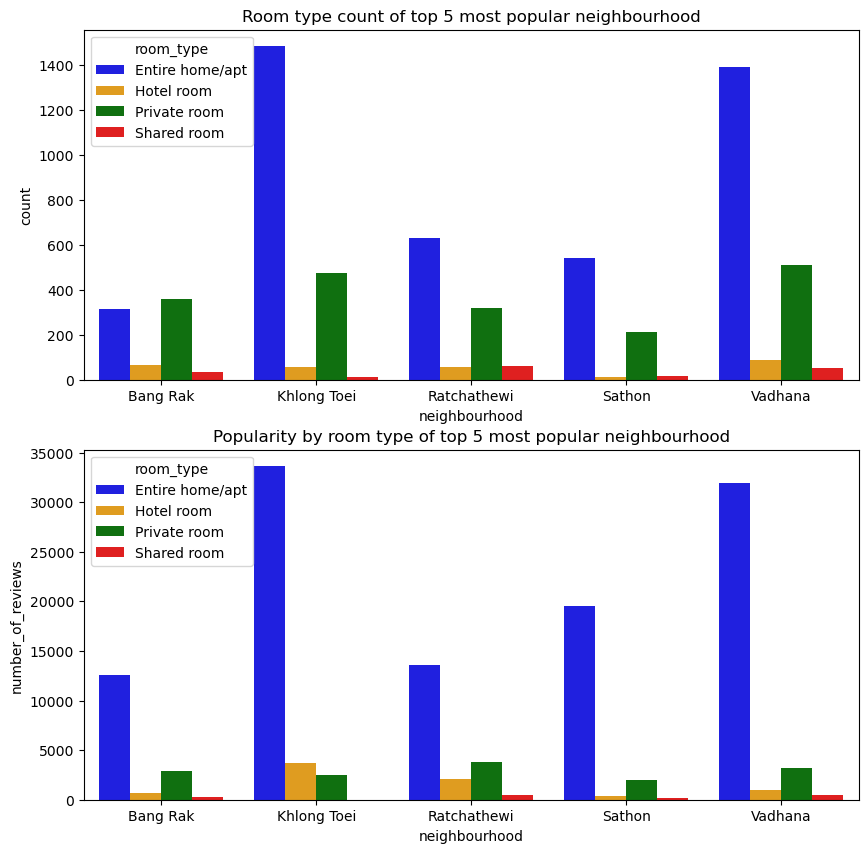

In [65]:
plt.figure(figsize=(10,10))

palette_1 = ["blue", "orange", "green", "red"]

plt.subplot(2,1,1)
sns.barplot(data=most_popular_neighbourhood_room_type, x="neighbourhood", y="count", hue="room_type", palette=palette_1)
plt.title("Room type count of top 5 most popular neighbourhood")

plt.subplot(2,1,2)
sns.barplot(data=most_popular_neighbourhood_room_type_sum_reviews, x="neighbourhood", y="number_of_reviews", hue="room_type", palette=palette_1)
plt.title("Popularity by room type of top 5 most popular neighbourhood");

- The highest count of room type from top 5 neighbourhood with most traffic is Entire home/apt
- The most popular room type from top 5 neighbourhood is also Entire home/apt

### Graphic #8

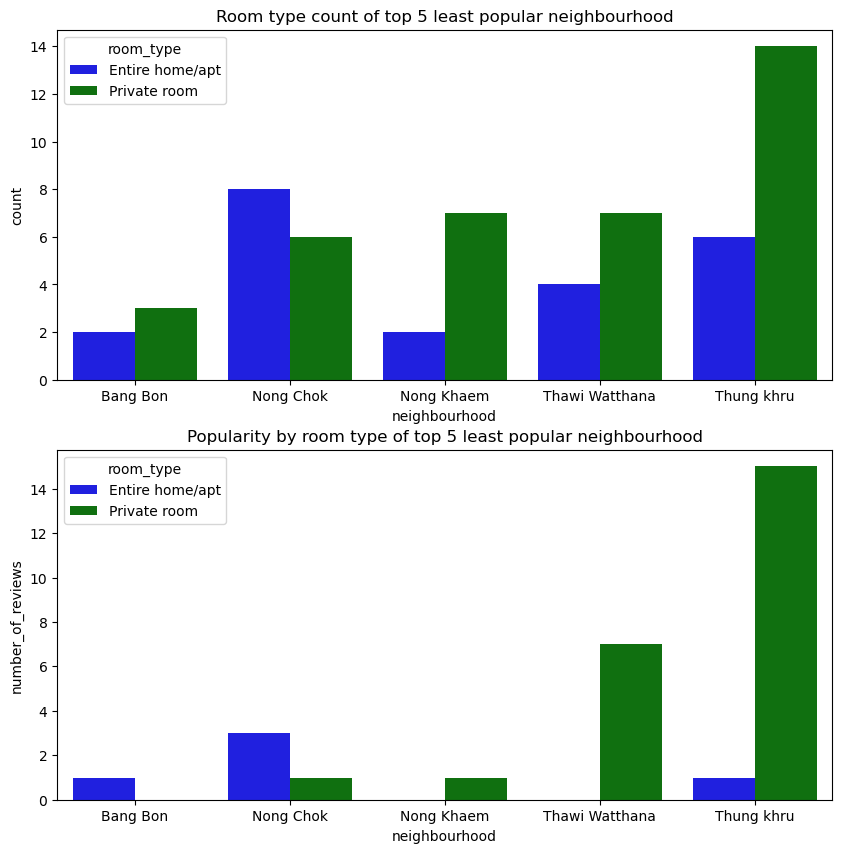

In [66]:
plt.figure(figsize=(10,10))

palette_2 = ["blue", "green"]

plt.subplot(2,1,1)
sns.barplot(data=least_popular_neighbourhood_room_type, x="neighbourhood", y="count", hue="room_type", palette=palette_2)
plt.title("Room type count of top 5 least popular neighbourhood")

plt.subplot(2,1,2)
sns.barplot(data=least_popular_neighbourhood_room_type_sum_reviews, x="neighbourhood", y="number_of_reviews", hue="room_type", palette=palette_2)
plt.title("Popularity by room type of top 5 least popular neighbourhood");

- The top 5 neighbourhood with least traffic only has two room type (Entire home/apt and Private Room)
- The highest count of room type is mostly private room
- As private room has higher listing_count than Entire home/apt, the traffic is also higher compared to Entire home/apt

---

In [67]:
# outliers from the bottom 20 neighbourhood in Graphic #4
outliers = ["Rat Burana", "Bangkok Yai", "Bang Khen"]

outliers_room_type_sum_reviews = df.loc[df["neighbourhood"].isin(outliers)].groupby(["neighbourhood", "room_type"])[["number_of_reviews"]].sum().reset_index()
outliers_room_type_sum_reviews

,neighbourhood,room_type,number_of_reviews
0,Bang Khen,Entire home/apt,548
1,Bang Khen,Hotel room,9
2,Bang Khen,Private room,170
3,Bang Khen,Shared room,0
4,Bangkok Yai,Entire home/apt,587
5,Bangkok Yai,Hotel room,0
6,Bangkok Yai,Private room,167
7,Bangkok Yai,Shared room,1
8,Rat Burana,Entire home/apt,559
9,Rat Burana,Private room,57


In [68]:
outliers_room_type_count = df.loc[df["neighbourhood"].isin(outliers)].groupby(by=["neighbourhood", "room_type"])["room_type"].count().to_frame().rename(columns={"room_type":"count"}).reset_index()
outliers_room_type_count

,neighbourhood,room_type,count
0,Bang Khen,Entire home/apt,47
1,Bang Khen,Hotel room,3
2,Bang Khen,Private room,64
3,Bang Khen,Shared room,1
4,Bangkok Yai,Entire home/apt,39
5,Bangkok Yai,Hotel room,3
6,Bangkok Yai,Private room,41
7,Bangkok Yai,Shared room,3
8,Rat Burana,Entire home/apt,30
9,Rat Burana,Private room,18


In [69]:
outliers_room_type_avg_price = df.loc[df["neighbourhood"].isin(outliers)].groupby(by=["neighbourhood", "room_type"])["price"].mean().reset_index().rename(columns={"price":"avg_price"})
outliers_room_type_avg_price

,neighbourhood,room_type,avg_price
0,Bang Khen,Entire home/apt,1345.127660
1,Bang Khen,Hotel room,1386.000000
2,Bang Khen,Private room,2905.875000
3,Bang Khen,Shared room,550.000000
4,Bangkok Yai,Entire home/apt,2615.307692
5,Bangkok Yai,Hotel room,1653.333333
6,Bangkok Yai,Private room,1876.926829
7,Bangkok Yai,Shared room,793.000000
8,Rat Burana,Entire home/apt,1860.800000
9,Rat Burana,Private room,1381.166667


In [70]:
outliers_room_type_sum_reviews_ltm = df.loc[df["neighbourhood"].isin(outliers)].groupby(["neighbourhood", "room_type"])[["number_of_reviews_ltm"]].sum().reset_index()
outliers_room_type_sum_reviews_ltm

,neighbourhood,room_type,number_of_reviews_ltm
0,Bang Khen,Entire home/apt,118
1,Bang Khen,Hotel room,0
2,Bang Khen,Private room,28
3,Bang Khen,Shared room,0
4,Bangkok Yai,Entire home/apt,196
5,Bangkok Yai,Hotel room,0
6,Bangkok Yai,Private room,11
7,Bangkok Yai,Shared room,0
8,Rat Burana,Entire home/apt,37
9,Rat Burana,Private room,7


### Graphic #9

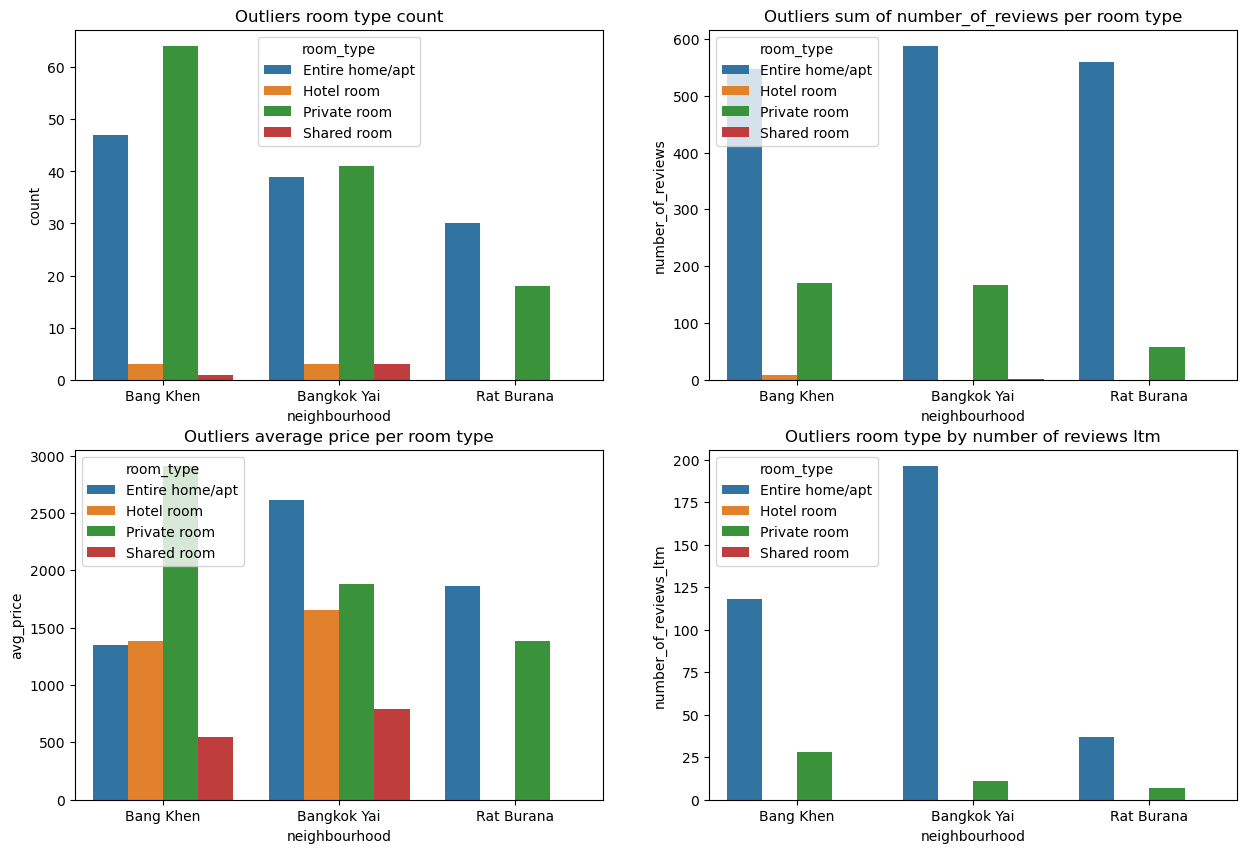

In [80]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.barplot(data=outliers_room_type_count, x="neighbourhood", y="count", hue="room_type")
plt.title("Outliers room type count")

plt.subplot(2,2,2)
sns.barplot(data=outliers_room_type_sum_reviews, x="neighbourhood", y="number_of_reviews", hue="room_type")
plt.title("Outliers sum of number_of_reviews per room type")

plt.subplot(2,2,3)
sns.barplot(data=outliers_room_type_avg_price, x="neighbourhood", y="avg_price", hue="room_type")
plt.title("Outliers average price per room type")

plt.subplot(2,2,4)
sns.barplot(data=outliers_room_type_sum_reviews_ltm, x="neighbourhood", y="number_of_reviews_ltm", hue="room_type")
plt.title("Outliers room type by number of reviews ltm");

The graph is showing the outliers room type from bottom 20 neighbourhood with least popularity (Rat Burana, Bangkok Yai, Bang Khen) from Graphic #4. Here we can see that the traffic that Entire home/apt room type has is way higher than private room which means that people are more interested to stay at an Entire home/apt instead of private room. However, most of them provide more private room than Entire home/apt.<br>

---

### Graphic #10

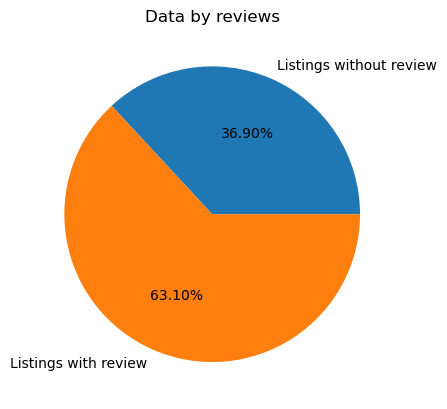

In [72]:
pie_label = ["Listings without review", "Listings with review"]
no_review = df.loc[df["number_of_reviews"] == 0]

without_review = round(len(no_review) / len(df) * 100, 2)
with_review = 100 - without_review
pie_value = [without_review, with_review]

plt.pie(
    x=pie_value,
    labels=pie_label,
    autopct=f'%.2f%%'
);
plt.title('Data by reviews');

As we can see, approximately one third of the listings data has no review, which we can conclude that one third of listings in the airbnb data has never been rented to anyone

---

Airbnb with no traffic / not popular (no reviews)

In [156]:
airbnb_with_traffic = df[df["number_of_reviews"] != 0]
airbnb_with_traffic.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,2,353,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,1,323,1
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,0.17,41,365,0


In [146]:
room_type_airbnb_with_traffic = airbnb_with_traffic.groupby(by="room_type")["name"].count().reset_index().rename(columns={"name":"listing_count"})
avg_price_airbnb_with_traffic = airbnb_with_traffic.groupby(by="room_type")["price"].mean().reset_index().rename(columns={"price":"avg_price"})

display(room_type_airbnb_with_traffic, avg_price_airbnb_with_traffic)

,room_type,listing_count
0,Entire home/apt,6180
1,Hotel room,390
2,Private room,2696
3,Shared room,197


,room_type,avg_price
0,Entire home/apt,3374.158576
1,Hotel room,2911.033333
2,Private room,2839.503338
3,Shared room,527.984772


In [155]:
airbnb_no_traffic = df[df["number_of_reviews"] == 0]
airbnb_no_traffic.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0.0,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.0,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0.0,3,365,0


In [148]:
room_type_airbnb_no_traffic = airbnb_no_traffic.groupby(by="room_type")["name"].count().reset_index().rename(columns={"name":"listing_count"})
avg_price_airbnb_no_traffic = airbnb_no_traffic.groupby(by="room_type")["price"].mean().reset_index().rename(columns={"price":"avg_price"})

display(room_type_airbnb_no_traffic, avg_price_airbnb_no_traffic)

,room_type,listing_count
0,Entire home/apt,2224
1,Hotel room,177
2,Private room,2823
3,Shared room,310


,room_type,avg_price
0,Entire home/apt,4024.407374
1,Hotel room,2811.135593
2,Private room,3300.314205
3,Shared room,1168.683871


### Graphic #11

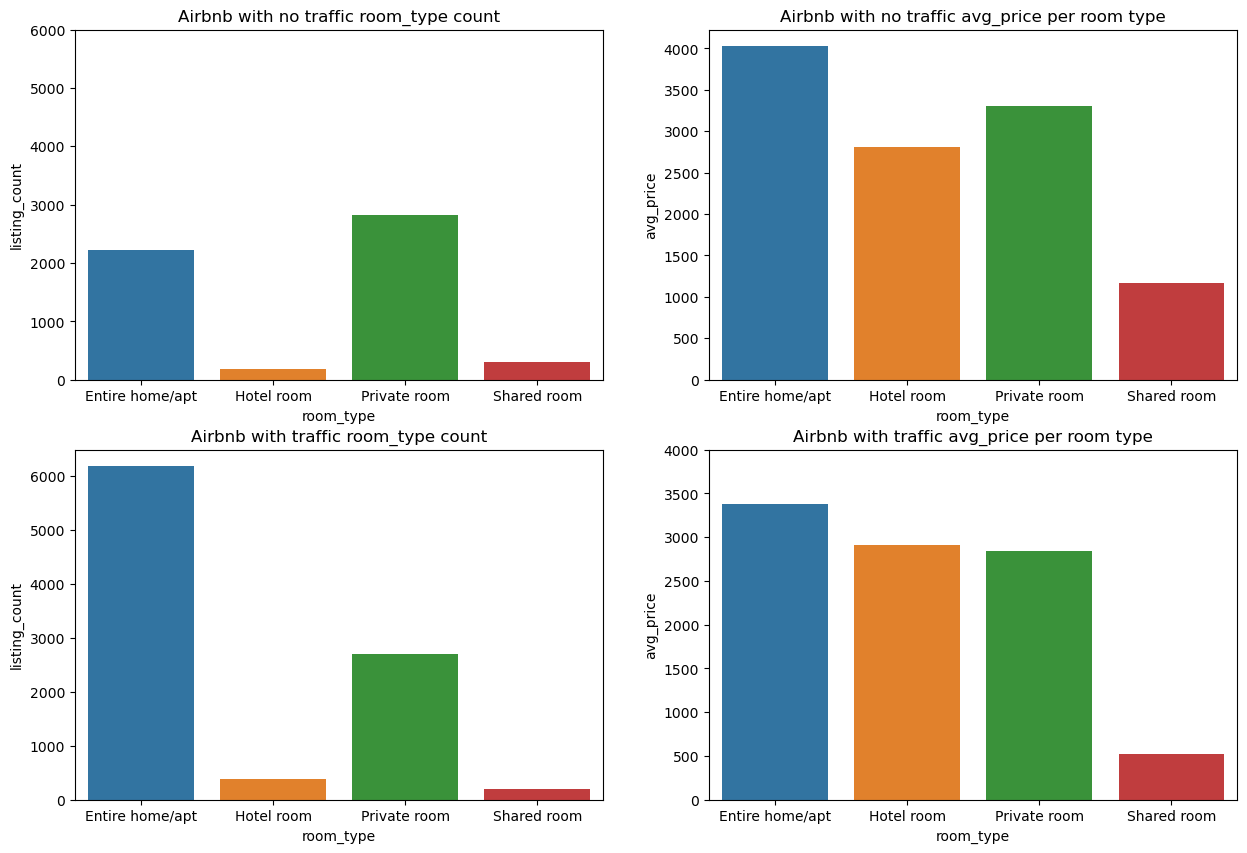

In [149]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.barplot(data=room_type_airbnb_no_traffic, x="room_type", y="listing_count")
plt.yticks(list(range(0, 6001, 1000)))
plt.title("Airbnb with no traffic room_type count")

plt.subplot(2,2,2)
sns.barplot(data=avg_price_airbnb_no_traffic, x="room_type", y="avg_price")
plt.title("Airbnb with no traffic avg_price per room type")

plt.subplot(2,2,3)
sns.barplot(data=room_type_airbnb_with_traffic, x="room_type", y="listing_count")
plt.title("Airbnb with traffic room_type count")

plt.subplot(2,2,4)
sns.barplot(data=avg_price_airbnb_with_traffic, x="room_type", y="avg_price")
plt.yticks(list(range(0, 4001, 500)))
plt.title("Airbnb with traffic avg_price per room type");

Top-left-side graphic:
- Private room has the most listing count, the second highest is Entire home/apt without traffic
- Hotel room has the least listing count<br>

Top-right-side graphic:
- Entire home/apt has the highest average price, followed by private room, then hotel room
- The cheapest among them all is shared room

Bottom-left-side graphic:
- Entire home/apt has the most listing count in airbnb dataset with traffic
- Room type with the least listing count is shared room

Bottom-right-side graphic:
- Entire home/apt has the highest average price, followed by hotel room, then private room
- The cheapest among them all is shared room

Insight:
- In the airbnb dataset that has traffic, people tend to choose Entire home/apt, however in this dataset (airbnb with no traffic) the listing count of private room is higher than Entire home/apt
- The average price of each type of room in airbnb dataset that has no traffic tend to be higher than the average price in the airbnb that has traffic

---

In [150]:
avg_price_airbnb_no_traffic = airbnb_no_traffic.groupby(by="neighbourhood")["price"].mean().sort_values(ascending=False).head(10).reset_index()
avg_price_airbnb_with_traffic = airbnb_with_traffic.groupby(by="neighbourhood")["price"].mean().sort_values(ascending=False).head(10).reset_index()

display(avg_price_airbnb_no_traffic, avg_price_airbnb_with_traffic)

,neighbourhood,price
0,Khlong San,7621.398496
1,Bang Phlat,6402.528090
2,Parthum Wan,5967.734848
3,Vadhana,5832.605932
4,Bang Kapi,5007.757812
5,Bang Rak,4724.394850
6,Din Daeng,4513.438596
7,Yan na wa,3994.826531
8,Pom Prap Sattru Phai,3918.162162
9,Sathon,3708.511211


,neighbourhood,price
0,Huai Khwang,6894.185668
1,Bang Phlat,6790.495575
2,Nong Chok,5674.750000
3,Khlong Toei,4654.879718
4,Lat Phrao,3908.500000
5,Vadhana,3775.948237
6,Ratchathewi,3639.179452
7,Parthum Wan,3628.835017
8,Bang Khun thain,3601.875000
9,Bang Khen,3278.018182


### Graphic #12

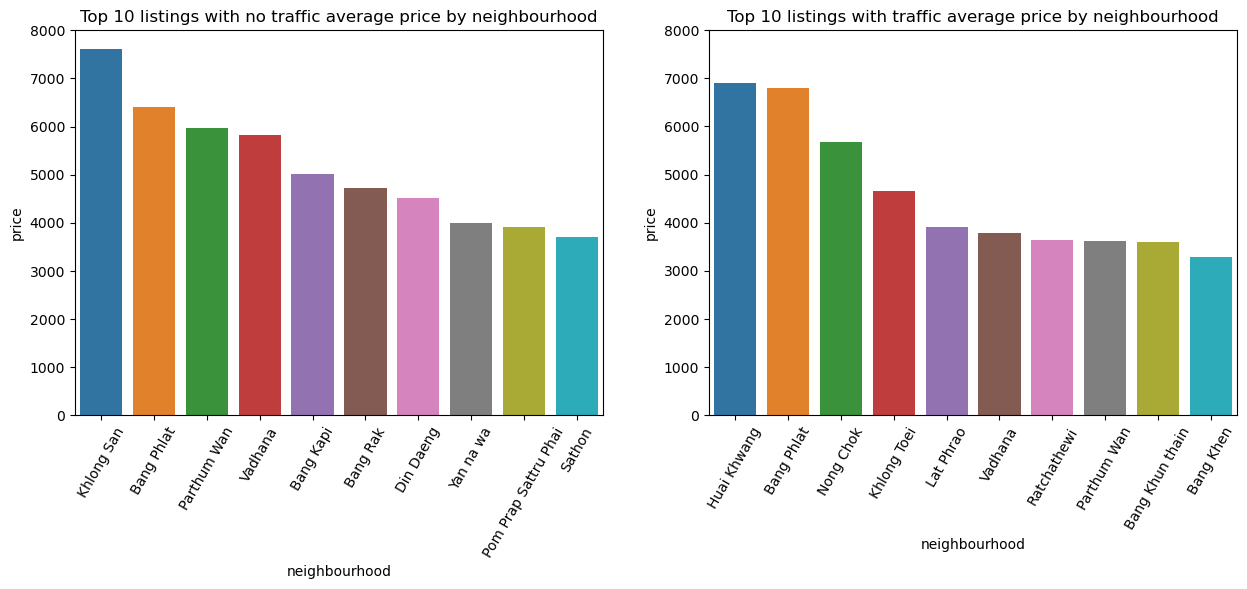

In [158]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(data=avg_price_airbnb_no_traffic, x="neighbourhood", y="price")
plt.xticks(rotation=60)
plt.title("Top 10 listings with no traffic average price by neighbourhood")

plt.subplot(1,2,2)
sns.barplot(data=avg_price_airbnb_with_traffic, x="neighbourhood", y="price")
plt.yticks(range(0, 8001, 1000))
plt.xticks(rotation=60)
plt.title("Top 10 listings with traffic average price by neighbourhood");

In [152]:
airbnb_with_traffic_avg_price = airbnb_with_traffic["price"].mean()
airbnb_with_no_traffic_avg_price = airbnb_no_traffic["price"].mean()
print("Average price of airbnb listings that has no traffic: " + str(airbnb_with_traffic_avg_price))
print("Average price of airbnb listings that has traffic: " + str(airbnb_with_no_traffic_avg_price))

Average price of airbnb listings that has no traffic: 3143.4975166437703
Average price of airbnb listings that has traffic: 3456.2580411998556


As we can see, the average price of listings that has no traffic in some neighbourhood is higher than the average price of listings with traffic. This could be the reason why there is no traffic on that listings which is on the left-side graphic as the price is higher compared to the right-side graphic.

---

## Conclusion and Recommendation

### **Conclusion**

Dataset
- One third of the dataset has no review. In this case i measure popularity / traffic using the amount of review the listings has. Hence, there is one third of the listings that has no traffic or could be said that the properties in the listing have never been rented before.
- The rest of the dataset has review, which could be interpreted such that there is traffic in those listings in the two third of the dataset portion.<br>

Room type
- The proportion count of Entire home/apt is more than half of the data, followed by private room as the second highest count.
- Entire home/apt tend to have the most traffic compared to the other room type, which means that Entire home/apt is the most popular among the others.
- As Entire home/apt room type has the most traffic, the average pricing for the room type is also the highest compared to the other three. This could be because of the more traffic it has, the more expensive it gets as high demand causing the price to go up.<br>

Room type, listing count, and traffic in most popular and least popular neighbourhood
- In Graphic #4, can be seen that listing_count tend to have positive correlation with sum of number_of_reviews (traffic). The higher the listing count, the higher the traffic a neighbourhood has. This also applies not only to the top 20 neighbourhood with most traffic, but also to the top 20 neighbourhood with least traffic. However, as we can see on the right-side graphic, there are three outliers which we can further analyse for our recommendation. Those three outliers are from the neighbourhood Rat Burana, Bangkok Yai, and Bang Khen. These three neighbourhood has low listing_count but has high traffic, which could be beneficial if we could analyze them and give some recommendation to the neighbourhood that has low listing_count to increase their traffic.
- Traffic in the neighbourhood also has a positive correlation with average price, the more traffic a neighbourhood has, the more expensive it gets. This can be seen in Graphic #5 for the top 5 neighbourhood with most traffic and Graphic #6 for the top 5 neighbourhood with least traffic.
- In the top 10 most popular neighbourhood, listings tend to have a room_type of Entire home/apt whereas in the top 10 least popular neighbourhood, listings tend to have their room_type to be a private room.<br>

Outliers from right-side graphic in Graphic #4
- The outliers are from the neighbourhood Rat Burana, Bangkok Yai, and Bang Khen.
- As we can see in Graphic #9, most of them has more private room instead of Entire home/apt except for Rat Burana. However, the most traffic all of them has is where the listing's room type is Entire home/apt.
- The average price is also higher in Entire home/apt room type compared to others except in Bang Khen where there are more private rooms, hence the price of the private room is also the highest compared to the others.<br>

Airbnb without traffic
- Listings that has no traffic tend to have more private room than entire home/apt whereas in listings that has traffic, people tend to choose entire home/apt instead of private room
- In the top 10 listings that has no traffic in the neighbourhood by average price, the average price is higher than the top 10 listings that has traffic in the neighbourhood by average price.
- The average price of Airbnb that has no traffic is also higher than the average price of airbnb that has traffic.

### **Recommendation**

**To Increase traffic in the least popular neighbourhood**<br>
- In order to increase the traffic in the least popular neighbourhood, we need to have more Entire home/apt room type and less private room as people tend to prefer to rent an Entire home/apt instead of private room. This recommendation is based on the popularity of each room type, which Entire home/apt tend to have more traffic and also based on the popularity of the room type from the three outliers from right-side graphic in graphic #4 which Entire home/apt is more popular compared to others even though there is more private room instead of Entire home/apt.<br>

**To get traffic in the airbnb that has never been rented before / has no traffic at all**<br>
- To get traffic for the listings, we must consider to lower the price as the average pricing for listings in the airbnb that has no traffic tend to be higher than those who has traffic. The gap in price could be the reason why people don't want to rent in those listings.
- The type of room provided need to have more Entire home/apt instead of private room  in order to attract traffic as like i mentioned before that people tend to prefer to rent an Entire home/apt instead of any other type of room.